### Regression model for predicting housing prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Get California Housing Prices from Kaggle
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
housing_df = pd.read_csv(url)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [3]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Exploratory Data Analysis

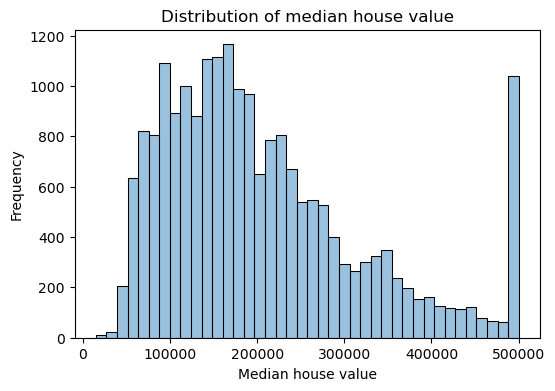

In [4]:
# Distribution of median house value
plt.figure(figsize=(6, 4))
sns.histplot(housing_df.median_house_value, bins=40, alpha=0.45)
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.title('Distribution of median house value')

plt.show()

In [5]:
# function to calculate the percentage of missing values
def missing_values_table(df):
    """
    This function calculates the percentage of
    missing values in the dataset
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# check for missing values
missing_values_table(housing_df)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
total_bedrooms,207,1.0


In [6]:
# Keep only record with filtered `ocean_proximity`
df = housing_df[
    (housing_df["ocean_proximity"] == "<1H OCEAN") | (housing_df["ocean_proximity"] == "INLAND")
    ]
new_features_df = df.drop(["ocean_proximity"], axis = 1)
new_features_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


##### Question 1

In [7]:
# check for missing values
missing_values_table(new_features_df)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
total_bedrooms,157,1.0


##### Question 2

In [8]:
# Median of `population`
new_features_df.population.median()

1195.0

##### Question 3

In [9]:
np.random.seed(42)

n = len(new_features_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = new_features_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [10]:
# Apply log transformation to `median_house_value`
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [11]:
# linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [12]:
# Filling missing value with mean
def prepare_X(df):
    mean_total_bedrooms = df.total_bedrooms.mean()
    df['total_bedrooms'].fillna(value = mean_total_bedrooms, inplace = True)
    X = df.values
    return X

# Get target
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

# Get prediction
y_pred = w_0 + X_train.dot(w)


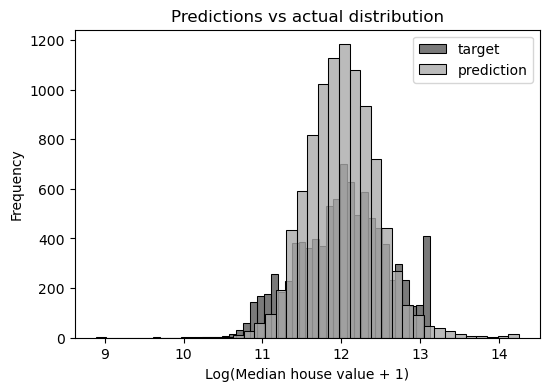

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Median house value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [14]:
rmse(y_train, y_pred)

0.340030082226426

In [15]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [16]:
round(rmse(y_val, y_pred), 2)

0.34

In [17]:
# Filling missing value with zero
def prepare_X_0(df):
    df['total_bedrooms'].fillna(value = 0, inplace = True)
    X = df.values
    return X

# Get target
X_train_0 = prepare_X_0(df_train)
w_0, w = train_linear_regression(X_train_0, y_train)

# Get prediction
y_pred_0 = w_0 + X_train_0.dot(w)


In [18]:
rmse(y_train, y_pred_0)

0.340030082226426

In [19]:
X_val_0 = prepare_X_0(df_val)
y_pred_0 = w_0 + X_val_0.dot(w)

In [20]:
round(rmse(y_val, y_pred_0), 2)

0.34

##### Question 4

In [21]:
# Using Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
# train without regularization
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.340030082226426
validation: 0.3405701119665767


In [23]:
# Apply regularization
X_train = prepare_X_0(df_train)
X_val = prepare_X_0(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 4))

     0 0.3406
 1e-06 0.3406
0.0001 0.3406
 0.001 0.3406
  0.01 0.3406
   0.1 0.341
     1 0.3447
     5 0.3476
    10 0.3482


##### Question 5

In [24]:
all_rmse = []
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seed:
    np.random.seed(s)
    n = len(new_features_df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = new_features_df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Apply log transformation to `median_house_value`
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # Apply regularization
    X_train = prepare_X_0(df_train)
    X_val = prepare_X_0(df_val)

    w_0, w = train_linear_regression_reg(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    all_rmse.append(round(rmse(y_val, y_pred), 3))
    print('%6s' %s, round(rmse(y_val, y_pred), 3))


     0 0.338
     1 0.338
     2 0.338
     3 0.332
     4 0.339
     5 0.343
     6 0.339
     7 0.347
     8 0.351
     9 0.334


In [25]:
# standard deviation of all scores
round(np.std(all_rmse), 3)

0.005

##### Question 6

In [26]:
np.random.seed(9)
n = len(new_features_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = new_features_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# combine train and validation dataset
df_train_ = pd.concat([df_train, df_val])

# Apply log transformation to `median_house_value`
df_train_ = df_train_.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train_.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train_['median_house_value']
del df_test['median_house_value']

# Apply regularization
X_train_ = prepare_X_0(df_train_)
X_test = prepare_X_0(df_test)
w_0, w = train_linear_regression_reg(X_train_, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
print('test:', round(rmse(y_test, y_pred), 3))

test: 0.335
